# **Bellingen Riverwatch Analysis:**

In [18]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import warnings 

warnings.filterwarnings("ignore")
df = pd.read_excel (r'bellingen-riverwatch-ongoing-data_last-updated-20210812_ig.xlsx', sheet_name= "ALL DATA (BY LOCATION) NEW" )

# print(type(df))
# print(len(df))
# print(df.shape)
# print(df.describe)
# print(df.info())
# print(df.isnull().sum().sum())


## **I. Data Description:**
- The Bellingen Riverwatch (BR) is a community-based scientific undertaking aimed at providing continuous water quality data that would support the recovery of the local and critically endangered Bellingen River Snapping turtle (BRST).
 - BR engages 43 volunteers and 5 schools to collect monthly water quality data at 25 sites. 
- The collected data has 41 columns and 990 rows with a total of 17754 null or missing values. 
- The Objective of this report is to conduct an Exploratory Data Analysis (EDA) to study the trends and relationship in the water quality of  BR annually and each summer. 
 

## **II. Data Dictionary & Initial Data Cleaning:**
- In our initial data cleaning, we will aim to remove as many irrelevant variables as possible, for this reason, we will be creating two tables as follow: 
- Table 1: will contain all the excluded variables along with a brief explanation of the reason why they were excluded. 
- Table 2: will contain all the variables that are included in the analysis along with a description and a value range of those variables. (This will constitute our data dictionary). 

### **Table 1:**
| Variable Name:| Justification for why the variable was Excluded: | 
| --- | --- | 
|Location Name| Using the site code instead yields the same result but with a neater analysis. | 
|Latitude/Northings| Only important for volunteers who try to pinpoint the specific testing location. |
|Longitude/Eastings|Only important for volunteers who try to pinpoint the specific testing location. | 
|EPSG Code|Used in mapping and hence not important for the purpose of this analysis. |
|Survey Time|The survey time differs significantly as volunteers have a window of two days to complete the test, hence not useful for our analysis.| 
|Site observations| Descriptive wording is very difficult to analyse and especially when the range of vocabulary used is very broad. |
|Survey duration (hrs)|This variable might have a slight impact on the accuracy of the data collected, however, for the purpose of our analysis, we won't need this many details.|
|Sampler group name|Knowing who collected the data is not important for our analysis.|
|Number in sampler group | The Number of volunteers collecting the data won't impact either the data or our analysis|
|No. of volunteers testing|As mentioned previously.|
|Water type|Since the majority of testing was conducted on Fresh streams of water and since there are around 300 missing data for this variable, we will assume that all data were obtained from Fresh streams.|
|Rainfall (mm) (optional)|Since this variable was optional, not many volunteers tested it which resulted in having around 780 missing values in the data set, hence it was excluded for lack of data.|
|Rate of Flow (optional)|Not Enough Data.|
|Dissolved Oxygen (mg/L)|We will be using Dissolved Oxygen (% sat)instead since it is easier to deal with percentages.|
|Faecal Coliforms (CFU/100mL)|Not Enough Data.|
|E. coli (CFU/100mL)|No Data.|
|Total Phosphate (mg/L)|Not Enough Data.|
|Nitrates (mg/L as N)|Not Enough Data.|
|Did you calibrate your EC meter?|Calibrating the EC meter can in some cases make a big difference to the measured values of Electrical Conductivity (EC), however, for the purpose of our analysis we will assume that all meters were calibrated appropriately and that the measured EC values are a true reflection of the water EC values.|
|Water Testing Notes/Issues |Difficult to analyse, irrelevant, and Not Enough Data.|
|Photos uploaded|Difficult to analyse, irrelevant, and Not Enough Data.|
|Verifyed by Ingrid|irrelevant, and Not Enough Data.|
|Columns 33-40|These columns are either empty or contain irrelevant data.|


In [19]:
# Dropping all the columns (Variables) that were specified in table 1.
df.drop(df.columns[[1,2,3,4,6,7,8,9,10,11,12,14,16,23,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40]], axis=1, inplace=True) 
# print(df.info())
# print(df.dtypes)


### **Table 2 (Data Dictionary):**
| Variable Name:|  Values of the Variable:|Description:| 
| --- | --- | ---|
|SITE CODE|String: There are 35 unique codes.|This variable is used as a linking variable to potentially query data or to create new data frames. This variable will not be used to directly determine water quality.|
|Survey Date|String: 'YYYY-MM-DD'.|This variable is also used as a linking variable to potentially query data or to create new data frames with different timeframes. This variable will not be used to directly determine water quality.|
|Rainfall in last 7 days|String: Three possible values ("Light, "Moderate", "Heavy").  |Rainfall was highlighted within the volunteer manual as an important factor with potential impact on the quality of water, that is, it has the potential to impact other variables that determines the quality of water such as pH, EC and Available Phosphate. |
|Water level or flow|String: Three possible values ("Low", "Medium", "High"). |Same as Rainfall, it was highlighted within the manual as an important variable that could affect the water quality indirectly.|
|Air Temperature (deg C)|Float: Any value, usually between 0-100.|Temperature was not used int the "ANZECC Freshwater Water Quality Guidelines & Ratings" as a determining factor for the water quality, however, this variable was one of the most well tested and frequently tested variable. Therefore, it would be important to perform at least some basic Exploratory Analysis to uncover any potential relationship or trend.|
|Water Temperature (deg C)|Float: Any value, usually between 0-100.|The previous explanation for "Air Temperature" appleis here as well.|
|pH (pH units)|Float: Any value between 0-14.|One of the main determining factors of water quality as identified by "ANZECC Guidelines". A score of 14 is highly basic, a score of 7 is neutral, and a score of 0 is highly acidic.|
|Electrical Conductivity (µS/cm)|Integer: Can take any positive value.|One of the main determining factors of water quality as identified by "ANZECC Guidelines". A higher conductivity indicates a high concentration of dissolved minerals which in turn signals a poor water quality. |
|Turbidity (NTUs)|Integer: Can take any positive value. |One of the main determining factors of water quality as identified by "ANZECC Guidelines". A score of less than 1 is needed for the water to be drinkable and a score of more than 30 indicates a very poor water quality.|
|Available Phosphate (mg/L)|Float: Can take any value, usually between 0 to 1.|One of the main determining factors of water quality as identified by "ANZECC Guidelines". The more Phosphate Available in waterways, the more algae and weeds would grow and the less dissolved oxygen there would be for aquaticlife. Values above 0.15 mg/L signal a very poor water quality.|
|Dissolved Oxygen (% sat)|Float: Can take any value, usually between 0% to 100%.|One of the main determining factors of water quality as identified by "ANZECC Guidelines". Dissolved oxygen is essential for the sustenance of aquaticlife. 100% is the saturation level but in some situations, waterways might be oversaturated with oxygen, however, this is also harmful to aquaticlife, good saturation levels range from 80% to 100% .|

## **III. Data Quality:**
- The Data quality of BR was rated as very good by the NSW government Data Quality Team.  
- The data set however contains many missing values, wrong values, and outliers. Therefore, the data set needs to undergo some major cleaning before it can be used for our EDA.
- In total there were 810 missing values in our data set. 
- The following table lists all the variables included in our analysis along with a brief explanation of how data for each variable was cleaned. 

### **Table 3:**
| Variable Name:|Justification for why the data was handled this way:| 
| --- | --- | 
|SITE CODE|No Cleaning Required.|
|Survey Date|No Cleaning Required.|
|Rainfall in last 7 days| Missing values will be replaced with the values "Light, Moderate or Heavy" based on their proportion of the total data avialable before cleaning, that is, since "Light" shows up 431 times out of a total of 867 and since there are 123 missing values in the variable "Rainfall in last 7 days", the new after cleaning "Light" values will be $(431\div867\times123)+431=492$, using this technique, the data would not be affected by the cleaning process. We will also replace all wrong values using the same logic. Note that wrong values here are equivalent to outliers in numerical data.|
|Water level or flow|Same logic as for the "Rainfall in last 7 days" variable. |
|Air Temperature (deg C)|Air temperature had no extreme outliers but had some missing values. Missing values were substituted with the mean, this is because the data distribution was roughly symmetric.|
|Water Temperature (deg C)|Water temperature had no extreme outliers but had some missing values. Missing values were substituted with the mean, this is because the data distribution was roughly symmetric.|
|pH (pH units)|pH variable had both outliers and missing values. Outliers were replaced with the median since the mean is affected by extreme outliers and the missing values were substituted with the mean because pH's distribution after removing the outliers was roughly symmetric.|
|Electrical Conductivity (µS/cm)|EC had both outliers and missing values. Outliers were replaced with the median since the mean is affected by extreme outliers and the missing values were filled with the mean because EC's distribution after removing the outliers was roughly symmetric. |
|Turbidity (NTUs)|Turbidity had both outliers and missing values. Outliers were replaced with the median since the mean is affected by extreme outliers and the missing values were also filled with the median because the distribution after removing the outliers was positively skewed.|
|Available Phosphate (mg/L)|Available Phosphate had both outliers and missing values. Outliers were replaced with the median since the mean is affected by extreme outliers and the missing values were also filled with the median because the distribution after removing outliers was positively skewed.|
|Dissolved Oxygen (% sat)|Dissolved Oxygen had both outliers and missing values. Outliers were replaced with the median since the mean is affected by extreme outliers and the missing values were also filled with the median because the distribution after removing the outliers was negatively skewed.|


#### **Step 1:**
The process of data cleaning starts by studying the overall structure of the data. 

In [20]:
# These lines of code are used to study the number of missing values and their locations in the dataset
# print(df.isnull().sum().sum())
# print(df.info())

# uniq_value = df[['SITE CODE','Survey Date','Rainfall in last 7 days'
# ,'Water level or flow','Air Temperature (deg C)','Water Temperature (deg C)','pH (pH units)',
# 'Electrical Conductivity (µS/cm)','Turbidity (NTUs)','Available Phosphate (mg/L)'
# ,'Dissolved Oxygen (% sat)']].nunique()

# print(df['SITE CODE'].value_counts())
# print(df['Rainfall in last 7 days'].value_counts()) 
# print(df['Water level or flow'].value_counts())

# print(uniq_value)
# print(number_of_values.head(40))

#### **Step 2:**
In the second step we remove all wrong values in the categorical variables, i.e. "Rainfall in last 7 days" & "Water level or flow".

In [21]:
# This code removes or replaces all wrong values in categorical variables. Retrieved from:
# https://stackoverflow.com/questions/39059032/randomly-insert-nas-values-in-a-pandas-dataframe

# Replacing wrong values from "Rainfall in last 7 days" with nan (Not Available)
df['Rainfall in last 7 days'].replace(to_replace=["within 24 hours, light"
,"Nil","light","nil","with 24 hours", "medium","Heaby"
,"heavy","Medium", "with 24 hours, medium", "Heavy/Light","light, 1-7 days"]
, value = np.nan, inplace = True)
# print(df['Rainfall in last 7 days'].value_counts()) 

# Replacing wrong values from "Water level or flow" with nan (Not Available)
df['Water level or flow'].replace(to_replace=["No flow"
,"low","Dry/isolated pool","Flood","flood", "dry/no water","very low"]
, value = np.nan, inplace = True)
# print(df['Water level or flow'].value_counts())

#### **Step 3:**
In the third step we identify which numerical variable contains outliers using distribution plots (In this case, histograms were used). 

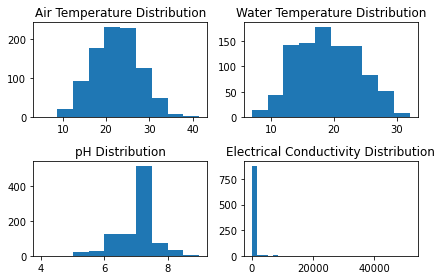

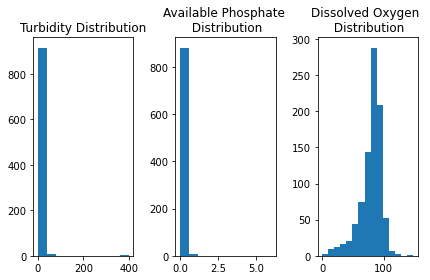

In [22]:
# This code detects numerical data with outliers by using distribution histograms.   
# Retrieved from https://matplotlib.org/stable/gallery/statistics/histogram_multihist.html#sphx-glr-gallery-statistics-histogram-multihist-py
fig1, ((ax0, ax1),(ax2, ax3)) = plt.subplots(nrows=2,ncols=2)
fig2, ((ax4,ax5,ax6)) = plt.subplots(nrows=1,ncols=3)
numb_of_bins= 10

ax0.hist(df['Air Temperature (deg C)'], bins = numb_of_bins)
ax0.set_title('Air Temperature Distribution')

ax1.hist(df['Water Temperature (deg C)'],bins= numb_of_bins)
ax1.set_title('Water Temperature Distribution')

ax2.hist(df['pH (pH units)'],bins=numb_of_bins)
ax2.set_title('pH Distribution')

ax3.hist(df['Electrical Conductivity (µS/cm)'],bins=numb_of_bins+20)
ax3.set_title('Electrical Conductivity Distribution')

ax4.hist(df['Turbidity (NTUs)'],bins=numb_of_bins)
ax4.set_title('Turbidity Distribution')

ax5.hist(df['Available Phosphate (mg/L)'],bins=numb_of_bins)
ax5.set_title('Available Phosphate \n Distribution')

ax6.hist(df['Dissolved Oxygen (% sat)'],bins=numb_of_bins+5)
ax6.set_title('Dissolved Oxygen \n Distribution')

fig1.tight_layout()
fig2.tight_layout()



#### **Step 4:**
In the fourth step we determine the extreme ranges for each variable were outliers exist, following that, the detected outliers will be replaced with the median instead of the mean since the mean is affected by extreme outliers.    

In [23]:
# Second step is to remove the outliers as identified by the distribution histograms.
# Retrieved from: https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-a-pandas-dataframe
# This code determines what exactly is considered an outlier by finding the 90th percentile. 
quantile_air_temperature = df['Air Temperature (deg C)'].quantile(0.90)
quantile_water_temperature = df['Water Temperature (deg C)'].quantile(0.90) 
quantile_pH = df['pH (pH units)'].quantile(0.90)
quantile_electrical_Conductivity = df['Electrical Conductivity (µS/cm)'].quantile(0.90)
quantile_turbidity = df['Turbidity (NTUs)'].quantile(0.90)
quantile_available_phosphate = df['Available Phosphate (mg/L)'].quantile(0.90)
quantile_dissolved_oxygen = df['Dissolved Oxygen (% sat)'].quantile(0.90)
# print(quantile_electrical_Conductivity)
# print(quantile_air_temperature,quantile_water_temperature, quantile_pH, quantile_electrical_Conductivity
# ,quantile_turbidity, quantile_available_phosphate, quantile_dissolved_oxygen)

# This code determines the median which will be the substitute for the outliers.  
median_air_temperature = df['Air Temperature (deg C)'].median()
median_water_temperature = df['Water Temperature (deg C)'].median() 
median_pH = df['pH (pH units)'].median()
median_electrical_Conductivity = df['Electrical Conductivity (µS/cm)'].median()
median_turbidity = df['Turbidity (NTUs)'].median()
median_available_phosphate = df['Available Phosphate (mg/L)'].median()
median_dissolved_oxygen = df['Dissolved Oxygen (% sat)'].median()
# print(median_electrical_Conductivity)
# print(median_air_temperature,median_water_temperature, median_pH, median_electrical_Conductivity
# ,median_turbidity, median_available_phosphate, median_dissolved_oxygen)

# This code replace outliers with medians, "Air Temperature (deg C)" & "Water Temperature (deg C)" &
# "pH (pH units)" are not included because the distribution is approximately normal with no outliers visible. 
df['pH (pH units)'].mask(df['pH (pH units)']
> quantile_pH, median_pH, inplace=True)
df['Electrical Conductivity (µS/cm)'].mask(df['Electrical Conductivity (µS/cm)']
> quantile_electrical_Conductivity, median_electrical_Conductivity, inplace=True)
df['Turbidity (NTUs)'].mask(df['Turbidity (NTUs)']
> quantile_turbidity, median_turbidity, inplace=True)
df['Available Phosphate (mg/L)'].mask(df['Available Phosphate (mg/L)']
> quantile_available_phosphate, median_available_phosphate, inplace=True)
df['Dissolved Oxygen (% sat)'].mask(df['Dissolved Oxygen (% sat)']
> quantile_dissolved_oxygen, median_dissolved_oxygen, inplace=True)



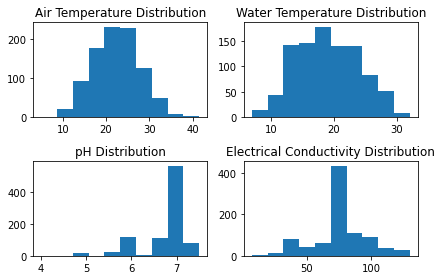

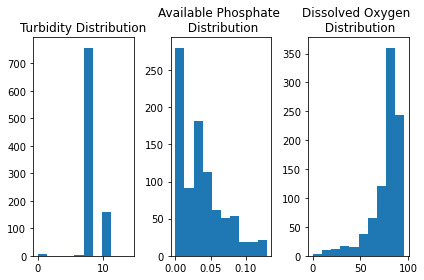

In [24]:
# This code plots the distribution histograms again to ensure that all outliers was removed.   
fig1, ((ax0, ax1),(ax2, ax3)) = plt.subplots(nrows=2,ncols=2)
fig2, ((ax4,ax5,ax6)) = plt.subplots(nrows=1,ncols=3)
numb_of_bins= 10

ax0.hist(df['Air Temperature (deg C)'], bins = numb_of_bins)
ax0.set_title('Air Temperature Distribution')

ax1.hist(df['Water Temperature (deg C)'],bins= numb_of_bins)
ax1.set_title('Water Temperature Distribution')

ax2.hist(df['pH (pH units)'],bins=numb_of_bins)
ax2.set_title('pH Distribution')

ax3.hist(df['Electrical Conductivity (µS/cm)'],bins=numb_of_bins)
ax3.set_title('Electrical Conductivity Distribution')

ax4.hist(df['Turbidity (NTUs)'],bins=numb_of_bins)
ax4.set_title('Turbidity Distribution')

ax5.hist(df['Available Phosphate (mg/L)'],bins=numb_of_bins)
ax5.set_title('Available Phosphate \n Distribution')

ax6.hist(df['Dissolved Oxygen (% sat)'],bins=numb_of_bins)
ax6.set_title('Dissolved Oxygen \n Distribution')

fig1.tight_layout()
fig2.tight_layout()

#### **Step 5:**
In the fifth step we fill in all the missing values for the categorical variables with the appropriate values defined in the data dictionary.  

In [25]:
# This code removes or replaces all missing values in categorical variables.
# Removing missing values from "Rainfall in last 7 days".
light_limit = round(431/867 *(123+162))
Moderate_limit = round(212/867 *(123+162))
Heavy_limit = round(62/867 *(123+162))
    
df['Rainfall in last 7 days'].fillna("Light", inplace = True, limit = light_limit)
df['Rainfall in last 7 days'].fillna("Moderate", inplace = True, limit = Moderate_limit)
df['Rainfall in last 7 days'].fillna("Heavy", inplace = True)
# print(df[['Rainfall in last 7 days']].value_counts())

# Removing missing values from "Water level or flow".
Mediumflow_limit = round(365/820 *(170+46))
Lowflow_limit = round(336/820 *(170+46))
Highflow_limit = round(73/820 *(170+46))
    
df['Water level or flow'].fillna("Medium", inplace = True, limit = Mediumflow_limit)
df['Water level or flow'].fillna("Low", inplace = True, limit = Lowflow_limit)
df['Water level or flow'].fillna("High", inplace = True)
# print(df[['Water level or flow']].value_counts())


#### **Step 6:**
In the sixth step we fill in all the missing values for the numerical variables with either the mean or the median based on the skewness of the distribution after the removal of all outliers.    

In [26]:
# This code removes or replaces all missing values in numerical variables.
# This procedure could have been simplified using the SimpleImputer() from sklearn.impute, however, This
# package is not available for us in this assignment. 
mean_air_temperature = df['Air Temperature (deg C)'].mean()
mean_water_temperature = df['Water Temperature (deg C)'].mean() 
mean_pH = df['pH (pH units)'].mean()
mean_electrical_Conductivity = df['Electrical Conductivity (µS/cm)'].mean()
median_turbidity = df['Turbidity (NTUs)'].median()
median_available_phosphate = df['Available Phosphate (mg/L)'].median()
median_dissolved_oxygen = df['Dissolved Oxygen (% sat)'].median()
# print(mean_air_temperature,mean_water_temperature, mean_pH, mean_electrical_Conductivity
# ,median_turbidity, median_available_phosphate, median_dissolved_oxygen)
# print(df[['Air Temperature (deg C)']].value_counts())

# This code replaces the missing values of a variable with either the mean or the median of that variable.  
df['Air Temperature (deg C)'].fillna(mean_air_temperature, inplace = True)
df['Water Temperature (deg C)'].fillna(mean_water_temperature, inplace = True)
df['pH (pH units)'].fillna(mean_pH, inplace = True)
df['Electrical Conductivity (µS/cm)'].fillna(mean_electrical_Conductivity, inplace = True)
df['Turbidity (NTUs)'].fillna(median_turbidity, inplace = True)
df['Available Phosphate (mg/L)'].fillna(median_available_phosphate, inplace = True)
df['Dissolved Oxygen (% sat)'].fillna(median_dissolved_oxygen, inplace = True)
# print(df[['Air Temperature (deg C)']].value_counts())



In [27]:
# Check if the data still have any missing values.
# print(df.isnull().sum().sum())
# print(df.info())

## **IV. Exploratory Data Analysis  (EDA):**
There are 6 main questions that we intend to answer via our EDA, the questions are as follow:
1. What is the general relationship between all numerical variables?
2. Does the BR water quality meet the ANZECC Freshwater Quality Guidlines & Ratings?
3. How does the water quality of BR change annually?
4. How does the water quality of BR change every summer? 
5. What is the relationship between "Water level or flow" and water quality? 
6. What is the relationship between "Rainfall in last 7 days" and water quality? 

It's important to note that we chose "Good Water Quality Ratings" from ANZECC Guidlines as our bench mark for comparsion. 

**The ratings were as follow:**
pH: 6-8.
Electrical Conductivity (µS/cm): 300-500.
Turbidity (NTUs): 7-10.
Available Phosphate (mg/L): 0.02 - 0.05.
Dissolved Oxygen (% sat):  90-100. 

### **Question 1:**
What is the general relationship between all numerical variables?

Text(0.5, 1.0, 'Correlations Heatmap:')

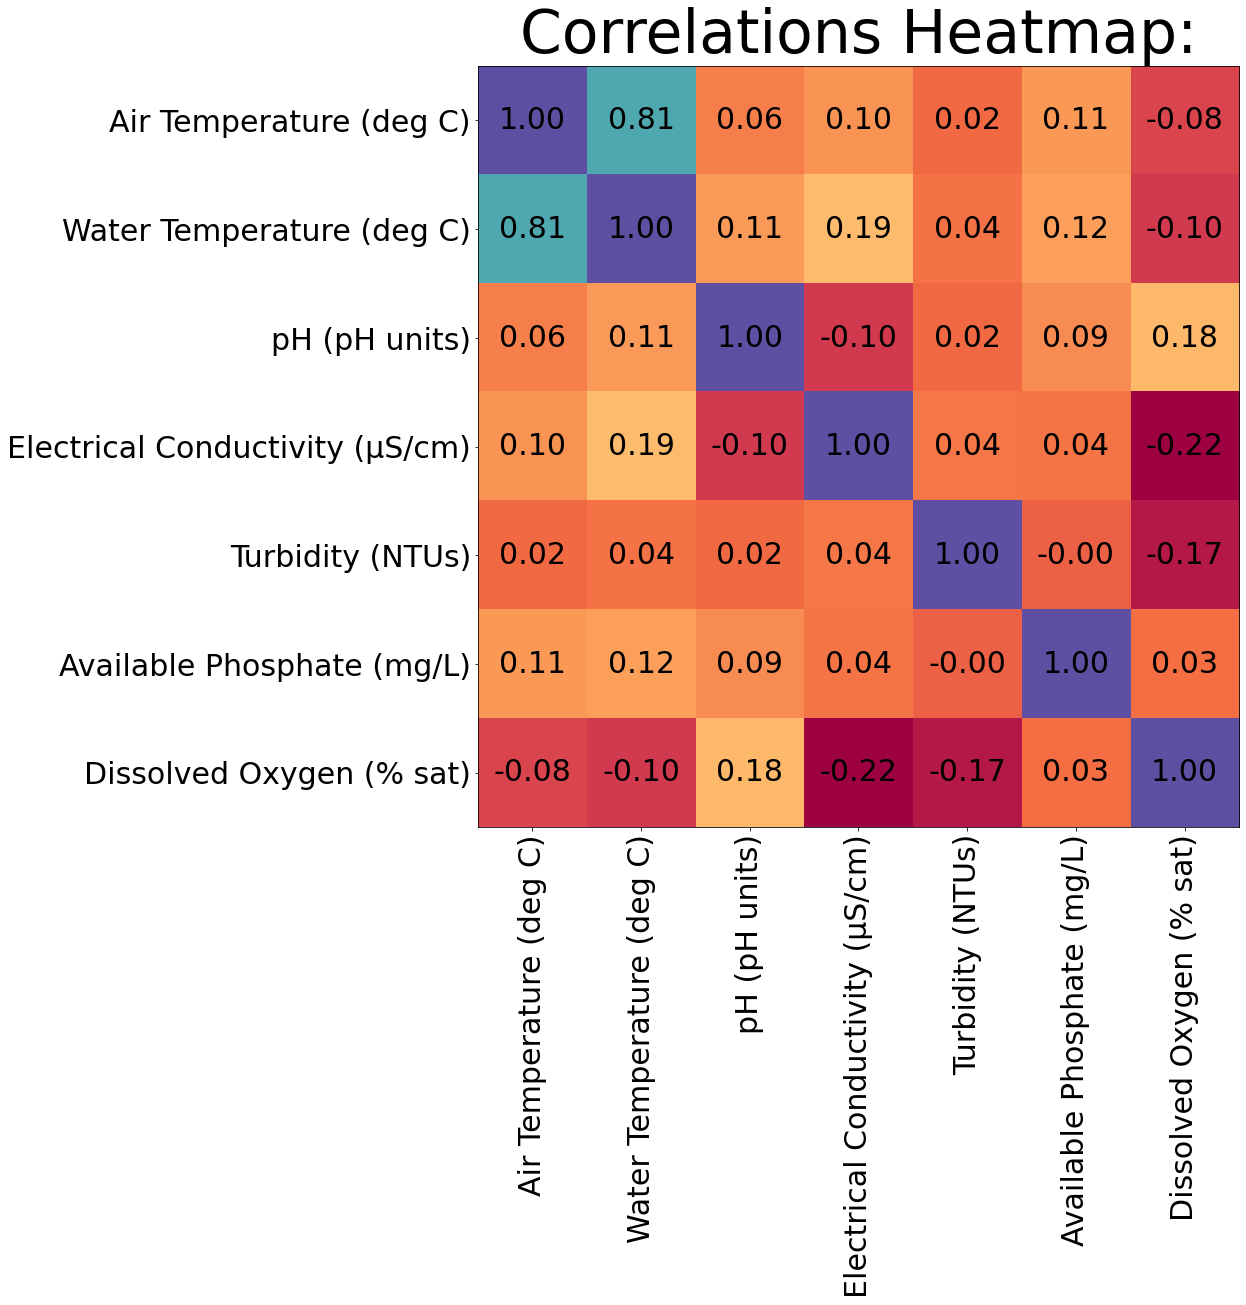

In [28]:
# find Correlations of the dataframe df.
corr_df = df.corr()

# Adjust the figure size
plt.figure(figsize = (40, 14))

#plot the heat map
plt.imshow(corr_df, cmap = 'Spectral')

# Number of variables
n_var = len(corr_df)

# adding axis titles
plt.xticks(range(n_var), corr_df.columns, fontsize = 30, rotation = 90)
plt.yticks(range(n_var), corr_df.columns, fontsize = 30)

# naming each cell. 
for i in range(n_var):
    for j in range(n_var):
        #  format to 2 decimal places  ,  horizonta/vertical align center  
        plt.text(i, j, '{:.2f}'.format(corr_df.iloc[i, j]), ha="center", va="center", color="k", fontsize = 30)

plt.title('Correlations Heatmap:', fontsize = 60)

### **Question 1 Answer:**
This heatmap demonstrates the correlation between all numerical variables. 
There was generally no strong correlation between any two variables except for one strong positive correlation between "Air Temperature" & "Water Temperature".
However, this correlation is intuitively predicted and doesn't really add much information to what we already know. 

### **Question 2:**
Does the BR water quality meet the ANZECC Freshwater Quality Guidlines & Ratings?

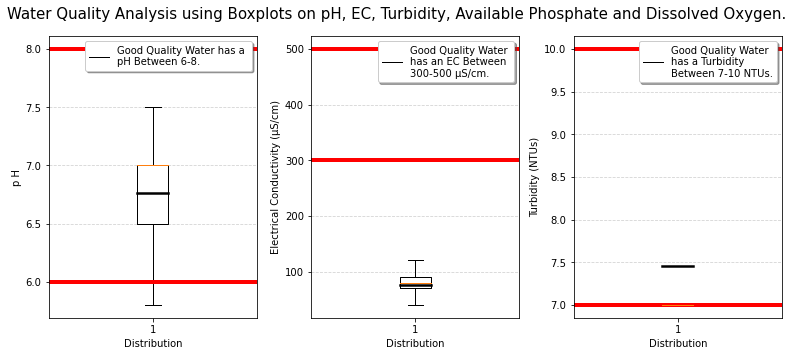

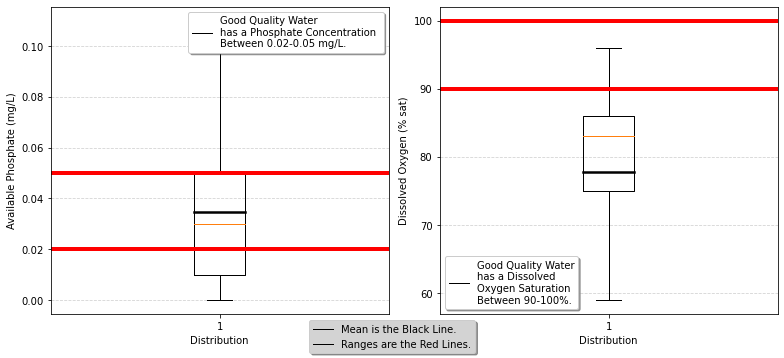

In [29]:
# Retrieved from https://matplotlib.org/3.5.0/gallery/statistics/boxplot_demo.html
# First List all the recommended values for "Good Water Quality"
recommended_pH = [6,8]
recommended_electrical_Conductivity = [300,500]
recommended_turbidity = [7,10]
recommended_available_phosphate =[0.02,0.05]
recommended_dissolved_oxygen = [90,100]

fig1, (ax0, ax1,ax2) = plt.subplots(nrows=1,ncols=3,figsize = (11, 5))
fig2, (ax3,ax4) = plt.subplots(nrows=1,ncols=2, figsize = (11, 5))
meanlineprops = dict(linestyle='-', linewidth=2.5, color='black')


# Boxplot for the variable "pH (pH units)" along with the recommended pH ranges according to ANZECC.
ax0.boxplot(df["pH (pH units)"], sym= "", meanprops=meanlineprops, meanline= True, showmeans=True, )
ax0.legend(('Good Quality Water has a \npH Between 6-8.',), loc='upper right', shadow=True)
ax0.yaxis.grid(True, linestyle='--', which='major', color='lightgrey',)
ax0.set(axisbelow=True, xlabel='Distribution', ylabel='p H')
ax0.axhline(recommended_pH[0], c='r',linewidth=4, linestyle='-')
ax0.axhline(recommended_pH[1], c='r',linewidth=4, linestyle='-')

# Boxplot for the variable "Electrical Conductivity (µS/cm)" along with the recommended
# EC ranges according to ANZECC.
ax1.boxplot(df["Electrical Conductivity (µS/cm)"], sym= "", meanprops=meanlineprops, meanline= True, showmeans=True)
ax1.legend(('Good Quality Water \nhas an EC Between \n300-500 µS/cm.',), loc='upper right', shadow=True)
ax1.yaxis.grid(True, linestyle='--', which='major', color='lightgrey',)
ax1.set(axisbelow=True, xlabel='Distribution', ylabel='Electrical Conductivity (µS/cm)')
ax1.axhline(recommended_electrical_Conductivity[0], c='r',linewidth=4, linestyle='-')
ax1.axhline(recommended_electrical_Conductivity[1], c='r',linewidth=4, linestyle='-')

# Boxplot for the variable "Turbidity (NTUs)" along with the recommended
# Turbidity ranges according to ANZECC.
ax2.boxplot(df["Turbidity (NTUs)"], sym= "", meanprops=meanlineprops, meanline= True, showmeans=True)
ax2.legend(('Good Quality Water \nhas a Turbidity \nBetween 7-10 NTUs.',), loc='upper right', shadow=True)
ax2.yaxis.grid(True, linestyle='--', which='major', color='lightgrey',)
ax2.set(axisbelow=True, xlabel='Distribution', ylabel='Turbidity (NTUs)')
ax2.axhline(recommended_turbidity[0], c='r',linewidth=4, linestyle='-')
ax2.axhline(recommended_turbidity[1], c='r',linewidth=4, linestyle='-')

# Boxplot the for variable "Available Phosphate (mg/L)" along with the recommended
# Available Phosphate ranges according to ANZECC.
ax3.boxplot(df["Available Phosphate (mg/L)"], sym= "", meanprops=meanlineprops, meanline= True, showmeans=True)
ax3.legend(('Good Quality Water \nhas a Phosphate Concentration \nBetween 0.02-0.05 mg/L.',), loc='upper right', shadow=True)
ax3.yaxis.grid(True, linestyle='--', which='major', color='lightgrey',)
ax3.set(axisbelow=True, xlabel='Distribution', ylabel='Available Phosphate (mg/L)')
ax3.axhline(recommended_available_phosphate[0], c='r',linewidth=4, linestyle='-')
ax3.axhline(recommended_available_phosphate[1], c='r',linewidth=4, linestyle='-')

# Boxplot the variable "Dissolved Oxygen (% sat)" along with the recommended
# Dissolved Oxygen ranges according to ANZECC.
ax4.boxplot(df["Dissolved Oxygen (% sat)"], sym= "", meanprops=meanlineprops, meanline= True, showmeans=True)
ax4.legend(('Good Quality Water\nhas a Dissolved\nOxygen Saturation \nBetween 90-100%.',), loc='lower left', shadow=True)
ax4.yaxis.grid(True, linestyle='--', which='major', color='lightgrey',)
ax4.set(axisbelow=True, xlabel='Distribution', ylabel='Dissolved Oxygen (% sat)')
ax4.axhline(recommended_dissolved_oxygen[0], c='r',linewidth=4, linestyle='-')
ax4.axhline(recommended_dissolved_oxygen[1], c='r',linewidth=4, linestyle='-')

fig2.legend(('Mean is the Black Line.','Ranges are the Red Lines.'),loc='lower center',facecolor= 'lightgrey', shadow=True)
fig1.suptitle('Water Quality Analysis using Boxplots on pH, EC, Turbidity, Available Phosphate and Dissolved Oxygen.',fontsize= 15)
fig1.tight_layout()
fig2.tight_layout()


### **Question 2 Answer:**
By looking at the boxplots, we could clearly notice the following:
- The water quality fell within the "Good Quality Rating" range for pH, Available Phosphate, and for Turbidity. 
- Electrical Conductivity fell way below the 300 mark which gives it a "Very Good" rating according to ANZECC.
- Finally, dissolved oxygen had saturation of around 78% which gives it a "Fair" rating.      

### **Question 3:**
How does the water quality of BR change annually?


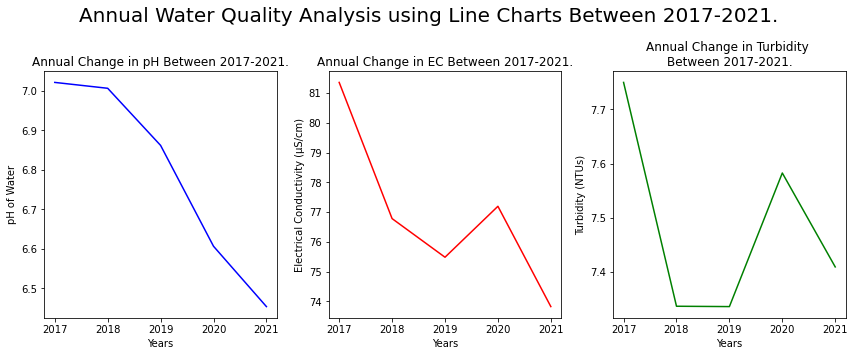

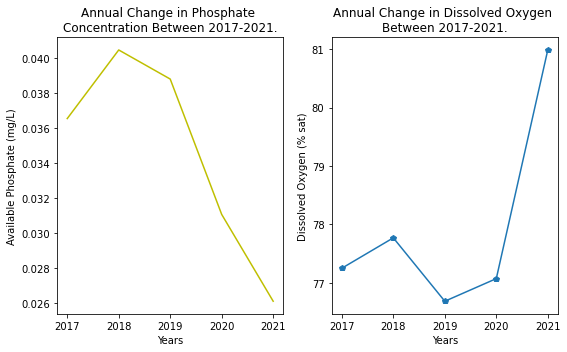

In [30]:
# Using linecharts to represent the annual change in water quality of BR. 
fig1, (ax0, ax1,ax2) = plt.subplots(nrows=1,ncols=3,figsize = (12, 5))
fig2, (ax3,ax4) = plt.subplots(nrows=1,ncols=2, figsize = (8, 5))

# Grouping all variables by year. 
df_linechart = df.groupby(df["Survey Date"].dt.year)[["pH (pH units)","Electrical Conductivity (µS/cm)",
"Turbidity (NTUs)","Available Phosphate (mg/L)","Dissolved Oxygen (% sat)"]].agg(['mean'])
# print(df_linechart)

# setting up the annual data to be plotted on linecharts.
xy0 = df_linechart["pH (pH units)"]
xy1 = df_linechart["Electrical Conductivity (µS/cm)"]
xy2 = df_linechart["Turbidity (NTUs)"]
xy3 = df_linechart["Available Phosphate (mg/L)"]
xy4 = df_linechart["Dissolved Oxygen (% sat)"]

# plot 5 linecharts of the annual change in water quality. 
ax0.plot(xy0, '-b')
ax0.set_title("Annual Change in pH Between 2017-2021.")
ax0.set(axisbelow=True, xlabel='Years', ylabel='pH of Water')

ax1.plot(xy1, '-r')
ax1.set_title("Annual Change in EC Between 2017-2021.")
ax1.set(axisbelow=True, xlabel='Years', ylabel='Electrical Conductivity (µS/cm)')

ax2.plot(xy2, '-g')
ax2.set_title("Annual Change in Turbidity \nBetween 2017-2021.")
ax2.set(axisbelow=True, xlabel='Years', ylabel='Turbidity (NTUs)')

ax3.plot(xy3, '-y')
ax3.set_title("Annual Change in Phosphate \nConcentration Between 2017-2021.")
ax3.set(axisbelow=True, xlabel='Years', ylabel='Available Phosphate (mg/L)')

ax4.plot(xy4, '-p')
ax4.set_title("Annual Change in Dissolved Oxygen \nBetween 2017-2021.")
ax4.set(axisbelow=True, xlabel='Years', ylabel='Dissolved Oxygen (% sat)')

fig1.suptitle('Annual Water Quality Analysis using Line Charts Between 2017-2021.',fontsize= 20)
fig1.tight_layout()
fig2.tight_layout()



### **Question 3 Answer:**
By analysing the line charts, we could observe the following:
- Water is becoming more acidic with pH dropping from above 7 to around 6.
- Electrical Conductivity is dropping, meaning that fewer chemical are being dissolved in the water.
-  Turbidity is decreasing which means that the water is becoming clearer.
- Phosphate available  has been decreasing  significantly which means that algae and weeds  have less chance of growing rapidly in the waterways. 
- Dissolved oxygen has been increasing and hence   more aquatic life will be supported. 

### **Question 4:**
How does the water quality of BR change every summer?

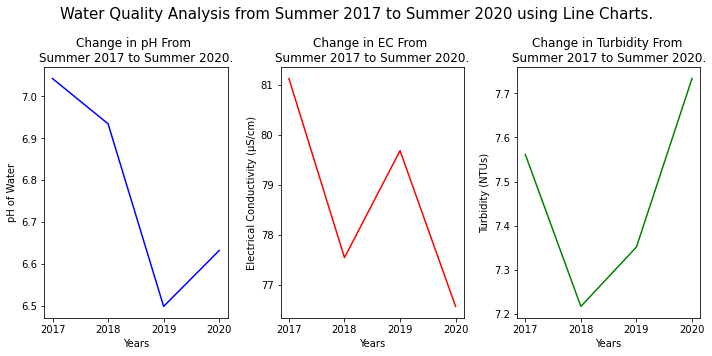

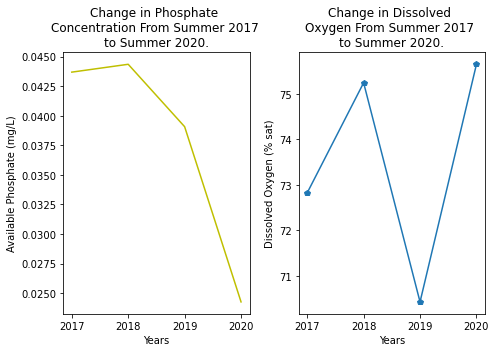

In [31]:
# Filtering all summer data.
summer_2017 = df.loc[(df["Survey Date"] >= '2017-12-01') & (df["Survey Date"] < '2018-03-01')]
summer_2018 = df.loc[(df["Survey Date"] >= '2018-12-01') & (df["Survey Date"] < '2019-03-01')]
summer_2019 = df.loc[(df["Survey Date"] >= '2019-12-01') & (df["Survey Date"] < '2020-03-01')]
summer_2020 = df.loc[(df["Survey Date"] >= '2020-12-01') & (df["Survey Date"] < '2021-03-01')]

# Taking the mean for all summer data.
summer_2017_means = summer_2017.mean()
summer_2018_means = summer_2018.mean()
summer_2019_means = summer_2019.mean()
summer_2020_means = summer_2020.mean()

# print(summer_2017_means)                     
# print(summer_2018_means) 
# print(summer_2019_means) 
# print(summer_2020_means) 

# Creating arrays for y axis. 
all_summers_pH = [summer_2017_means.iloc[2],summer_2018_means.iloc[2],summer_2019_means.iloc[2],
summer_2020_means.iloc[2]]
all_summers_EC = [summer_2017_means.iloc[3],summer_2018_means.iloc[3],summer_2019_means.iloc[3],
summer_2020_means.iloc[3]]
all_summers_turbidity = [summer_2017_means.iloc[4],summer_2018_means.iloc[4],summer_2019_means.iloc[4],
summer_2020_means.iloc[4]]
all_summers_phosphate = [summer_2017_means.iloc[5],summer_2018_means.iloc[5],summer_2019_means.iloc[5],
summer_2020_means.iloc[5]]
all_summers_oxygen = [summer_2017_means.iloc[6],summer_2018_means.iloc[6],summer_2019_means.iloc[6],
summer_2020_means.iloc[6]]
x_years = [2017,2018,2019,2020]

# print(all_summers_pH)
# print(all_summers_EC)
# print(all_summers_turbidity)
# print(all_summers_phosphate)
# print(all_summers_oxygen)

fig1, (ax0, ax1,ax2) = plt.subplots(nrows=1,ncols=3,figsize = (10, 5))
fig2, (ax3,ax4) = plt.subplots(nrows=1,ncols=2, figsize = (7, 5))

# plot 5 line charts to visualise the change in water quality from one summer to another. 
ax0.plot(x_years, all_summers_pH, '-b')
ax0.set_title("Change in pH From \nSummer 2017 to Summer 2020.")
ax0.set(axisbelow=True, xlabel='Years', ylabel='pH of Water')

ax1.plot(x_years, all_summers_EC, '-r')
ax1.set_title("Change in EC From \nSummer 2017 to Summer 2020.")
ax1.set(axisbelow=True, xlabel='Years', ylabel='Electrical Conductivity (µS/cm)')

ax2.plot(x_years, all_summers_turbidity, '-g')
ax2.set_title("Change in Turbidity From \nSummer 2017 to Summer 2020.")
ax2.set(axisbelow=True, xlabel='Years', ylabel='Turbidity (NTUs)')

ax3.plot(x_years,all_summers_phosphate, '-y')
ax3.set_title("Change in Phosphate \nConcentration From Summer 2017 \nto Summer 2020.")
ax3.set(axisbelow=True, xlabel='Years', ylabel='Available Phosphate (mg/L)')

ax4.plot(x_years, all_summers_oxygen, '-p')
ax4.set_title("Change in Dissolved \nOxygen From Summer 2017 \nto Summer 2020.")
ax4.set(axisbelow=True, xlabel='Years', ylabel='Dissolved Oxygen (% sat)')

fig1.suptitle('Water Quality Analysis from Summer 2017 to Summer 2020 using Line Charts.',fontsize= 15)
fig1.tight_layout()
fig2.tight_layout()

### **Question 4 Answer:**
By looking at the previous charts we can identify 3 trends that were already present in the annual analysis and 1 trend that wasn't present:
- The 3 identical trends are: Ph, Phosphate Available and, EC are all decreasing.
- The new trend is: Turbidity is increasing. This  however,is because the summer analysis didn't include the summer of 2021. Including which, would have created a trend that would conform to the trend from the annual analysis.
- No clear trends were observed for dissolved oxygen.    


### **Question 5:**
What is the relationship between "Water level or flow" and water quality?

In [32]:
# Grouping all variables that determines the water quality by the type of water level.
df_barchart = df.groupby('Water level or flow')[["pH (pH units)","Electrical Conductivity (µS/cm)",
"Turbidity (NTUs)","Available Phosphate (mg/L)","Dissolved Oxygen (% sat)"]].mean()

df_barchart_sorted_pH = df_barchart.sort_values('pH (pH units)')
print(df_barchart_sorted_pH.iloc[:,0])

df_barchart_sorted_EC = df_barchart.sort_values("Electrical Conductivity (µS/cm)")
print(df_barchart_sorted_EC.iloc[:,1])

df_barchart_sorted_Turbidity = df_barchart.sort_values("Turbidity (NTUs)")
print(df_barchart_sorted_Turbidity.iloc[:,2])

df_barchart_sorted_Phosphate = df_barchart.sort_values("Available Phosphate (mg/L)")
print(df_barchart_sorted_Phosphate.iloc[:,3])

df_barchart_sorted_Oxygen = df_barchart.sort_values("Dissolved Oxygen (% sat)")
print(df_barchart_sorted_Oxygen.iloc[:,4])


Water level or flow
Medium    6.744269
High      6.752317
Low       6.790817
Name: pH (pH units), dtype: float64
Water level or flow
High      68.494864
Medium    75.196518
Low       79.992627
Name: Electrical Conductivity (µS/cm), dtype: float64
Water level or flow
Medium    7.414317
Low       7.496471
High      7.528846
Name: Turbidity (NTUs), dtype: float64
Water level or flow
Low       0.033482
Medium    0.034312
High      0.039712
Name: Available Phosphate (mg/L), dtype: float64
Water level or flow
High      75.519231
Low       76.371765
Medium    79.655098
Name: Dissolved Oxygen (% sat), dtype: float64


### **Question 5 Answer:**
The observed trends are as follows:
- pH: No clear trends.
- EC: Increases as water level decreases (Inverse relationship).
- Turbidity: No clear trends.
- Available Phosphate: increases as water level increases. 
- Dissolved Oxygen: No clear trends.  

### **Question 6:**
What is the relationship between "Rainfall in last 7 days" and water quality?

In [33]:
# Grouping all variables that determines the water quality by the amount of rainfall in the last 7 days
df_barchart1 = df.groupby("Rainfall in last 7 days")[["pH (pH units)","Electrical Conductivity (µS/cm)",
"Turbidity (NTUs)","Available Phosphate (mg/L)","Dissolved Oxygen (% sat)"]].mean()

# Printing 5 tables sorted from low values to high values to learn how water quality changes when rainfall amount change 
df_barchart_sorted_pH1 = df_barchart.sort_values('pH (pH units)')
print(df_barchart_sorted_pH1.iloc[:,0])

df_barchart_sorted_EC1 = df_barchart.sort_values("Electrical Conductivity (µS/cm)")
print(df_barchart_sorted_EC1.iloc[:,1])

df_barchart_sorted_Turbidity1 = df_barchart.sort_values("Turbidity (NTUs)")
print(df_barchart_sorted_Turbidity1.iloc[:,2])

df_barchart_sorted_Phosphate1 = df_barchart.sort_values("Available Phosphate (mg/L)")
print(df_barchart_sorted_Phosphate1.iloc[:,3])

df_barchart_sorted_Oxygen1 = df_barchart.sort_values("Dissolved Oxygen (% sat)")
print(df_barchart_sorted_Oxygen1.iloc[:,4])

Water level or flow
Medium    6.744269
High      6.752317
Low       6.790817
Name: pH (pH units), dtype: float64
Water level or flow
High      68.494864
Medium    75.196518
Low       79.992627
Name: Electrical Conductivity (µS/cm), dtype: float64
Water level or flow
Medium    7.414317
Low       7.496471
High      7.528846
Name: Turbidity (NTUs), dtype: float64
Water level or flow
Low       0.033482
Medium    0.034312
High      0.039712
Name: Available Phosphate (mg/L), dtype: float64
Water level or flow
High      75.519231
Low       76.371765
Medium    79.655098
Name: Dissolved Oxygen (% sat), dtype: float64


### **Question 6 Answer:**
The observed trends are as follows:
- pH: No clear trends.
- EC: Increases as rainfall decreases (Inverse relationship).
- Turbidity: No clear trends.
- Available Phosphate: Increases as rainfall Increases. 
- Dissolved Oxygen: No clear trends.  

## **V.Conclusion:**
From our analysis, we have observed many interesting trends and relationships. Most importantly, we have observed that the water quality has been improving in terms of decreased turbidity, EC, Phosphate available, and an increased availability of dissolved oxygen. The only harmful trend that we have noticed is the rapid increase in the acidity of the water. An increase in acidity could mean that the river would become inhospitable to life and therefore, it is crucial that continuous  monitoring of the water quality is maintained. 